In [2]:
import numpy as np
import matplotlib.pyplot as plt

# FUNCIÓN DE PERDIDA

$L(w) = MSE = \frac{1}{N} \sum (y_i-\hat y_i)^2$

$L(w) = MSE = \frac{1}{N} \sum (y_i-(wx+b))^2$

$\frac{\partial L}{\partial w_j} = -\frac{2}{N} \sum(y_i-(wx_i+b))x_{ij}$

$\frac{\partial L}{\partial w_j} = -\frac{2}{N} \sum(y_i- \hat y) x_{ij}$

# ACTUALIZAR PESOS

$w_j \leftarrow w_j - \alpha \frac{\partial L}{\partial w_j}$

In [3]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

Text(0.5, 1.0, 'Onda Seno')

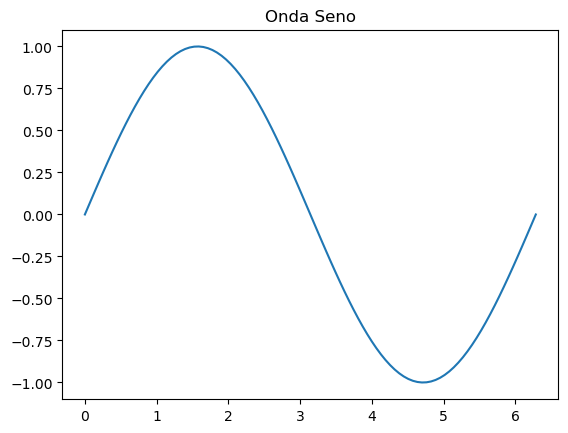

In [4]:
plt.plot(x, y)
plt.title('Onda Seno')

### <span style="color:#4CC9F0">Funciones de activación tipo sigmoide</span>

Son funciones cuyo gráfico tiene una  forma de "S" alargada. Hay varios tipos de funciones sigmoideas. Las más utilizadas son las funciones logísticas y tangentes hiperbólicas.

Esta función es definida por

$$
f(z) = \hat y =sigmoid(z) =\frac{1}{{1+ e^{-z}}},
$$
para $z\in \mathcal{R}$.

# Modelo

$z = wx + b$

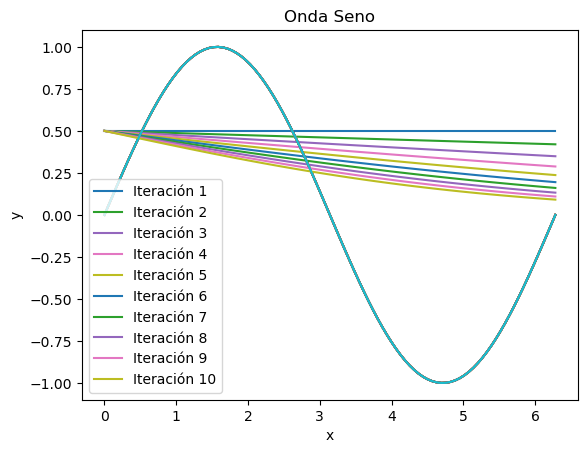

In [5]:

b = 0
w = [0] #inicializar w
alpha = 0.01 #tasa de aprendizaje
for i in range(10):
    z = w[i] * x + b #predicción
    y_hat= 1 / (1 + np.exp(-z)) #función sigmoide
    Lw = 1/len(x) * ((y - y_hat)**2).sum() #perdida
    dLdw = -2/len(x) * ((y - y_hat)* x).sum() #gradiente
    wj =w[i]- alpha * dLdw #ajuste de w
    w.append(wj) #guardar w
    plt.plot(x, y_hat, label=f'Iteración {i+1}')
    plt.plot(x,y)
    plt.legend()
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.title('Onda Seno')
    


#### <span style="color:#4CC9F0">Función de activacion Tangente hiperbólica</span>

La activación que funciona casi siempre mejor que la función sigmoidea es la función *tanh* también conocida como función tangente hiperbólica . En realidad, es una versión matemáticamente modificada de la función sigmoidea. Ambos son similares y pueden obtenerse una de la otra entre sí.


La función *Tanh* está definida por

$$
f(x) = tanh(x) = \frac{2}{{1+ e^{-2x}}}-1,
$$
para  $x\in \mathcal{R}$.

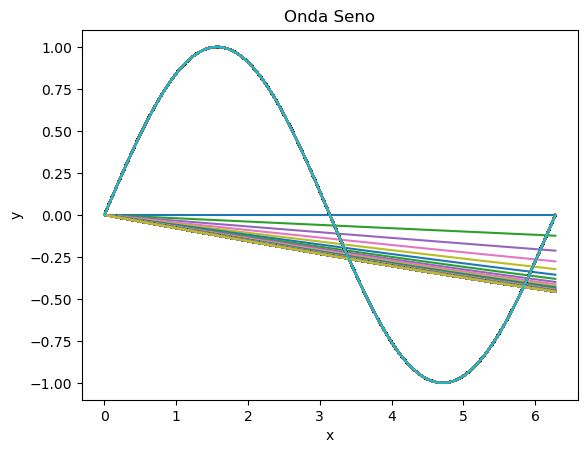

In [6]:
w = [0] #inicializar w
alpha = 0.01 #tasa de aprendizaje
for i in range(5000):
    z = w[i] * x + b #predicción
    y_hat= np.tanh(z)#función Tanh
    Lw = 1/len(x) * ((y - y_hat)**2).sum() #perdida
    dLdw = -2/len(x) * ((y - y_hat)* x).sum() #gradiente
    wj =w[i]- alpha * dLdw #ajuste de w
    w.append(wj) #guardar w
    plt.plot(x, y_hat, label=f'Iteración {i+1}')
    plt.plot(x,y)
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.title('Onda Seno')

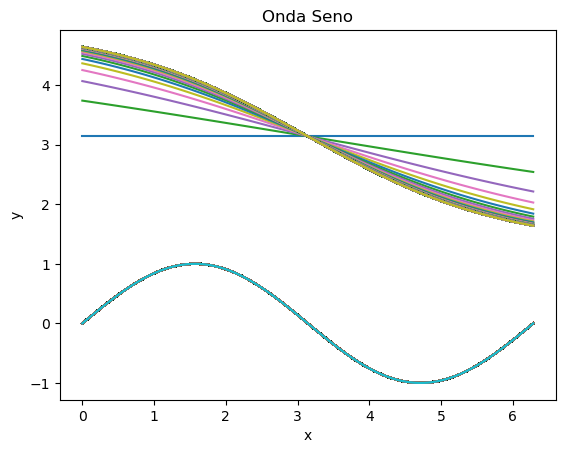

In [7]:
w = [0] #inicializar w
alpha = 0.1 #tasa de aprendizaje
for i in range(1000):
    x_scaler = (x - x.mean()) / x.std() #normalizar x
    z = w[i] * x_scaler + b #predicción
    y_hat= np.tanh(z)#función Tanh
    Lw = 1/len(x) * ((y - y_hat)**2).sum() #perdida
    dLdw = -2/len(x) * ((y - y_hat)* x).sum() #gradiente
    wj =w[i]- alpha * dLdw #ajuste de w
    w.append(wj) #guardar w
    y_hat_unscaled = y_hat * x.std() + x.mean() #desnormalizar y_hat
    plt.plot(x, y_hat_unscaled, label=f'Iteración {i+1}')
    plt.plot(x,y)
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.title('Onda Seno')

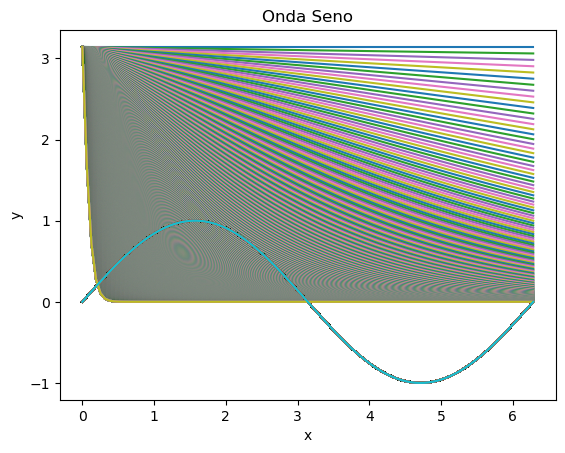

In [8]:
w = [0] #inicializar w
alpha = 0.01 #tasa de aprendizaje
for i in range(5000):
    x_scaler = (x - x.min()) / (x.max() -x.min()) #normalizar x
    z = w[i] * x_scaler + b #predicción
    y_hat= 1 / (1 + np.exp(-z)) #función sigmoide
    Lw = 1/len(x) * ((y - y_hat)**2).sum() #perdida
    dLdw = -2/len(x) * ((y - y_hat)* x).sum() #gradiente
    wj =w[i]- alpha * dLdw #ajuste de w
    w.append(wj) #guardar w
    y_hat_unscaled = y_hat * (x.max() -x.min()) + x.min() #desnormalizar y_hat
    plt.plot(x, y_hat_unscaled, label=f'Iteración {i+1}')
    plt.plot(x,y)
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.title('Onda Seno')

# INCLUIR UNA CAPA OCULTA

# APLICAR MÉTODO DE RETROPROPAGACIÓN

### PROPAGACIÓN HACIA ADELANTE - FORWARD PASS

$h = ActF(W_1 X + b_1)$

$\hat y = ActF(W_2 h+b_2)$

### PROPAGACIÓN HACIA ATRÁS (CAPA DE SALIDA) - BACKWARD PASS

$\frac{\partial L_2}{\partial W_2} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial z_2} \frac{\partial z_2}{\partial W_2}$

$\frac{\partial L}{\partial \hat y} = (\hat y - y)$

$\frac{\partial \hat y}{\partial z_2} =1 - \hat{y}^2$ para Tanh (0,1]

$\frac{\partial \hat y}{\partial z_2} =\hat{y}(1-\hat{y})$ Para Sigmoid (0,0.25]

$\frac{\partial \hat y}{\partial z_2} = 1 Si {z}>0; 0 si {z} <=0$ Para ReLU {0,1}

$\frac{\partial z_2}{\partial W_2} = h$

### PROPAGACIÓN HACIA ATRÁS (CAPA DE OCULTA) - BACKWARD PASS

$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial h} \frac{\partial h}{\partial z_1} \frac{\partial z_1}{\partial W_1}$

$\frac{\partial L}{\partial h} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_2} W_2 $

$\frac{\partial h}{\partial z_1} = 1 - \hat{y}^2$

$\frac{\partial z_1}{\partial W_1} = x$

$w_j \leftarrow w_j - \alpha \frac{\partial L}{\partial w_j}$

Época 0, Pérdida: 0.4943
Época 100, Pérdida: 0.1979
Época 200, Pérdida: 0.1972
Época 300, Pérdida: 0.1964
Época 400, Pérdida: 0.1954
Época 500, Pérdida: 0.1939
Época 600, Pérdida: 0.1913
Época 700, Pérdida: 0.1861
Época 800, Pérdida: 0.1741
Época 900, Pérdida: 0.1475
Época 1000, Pérdida: 0.1048
Época 1100, Pérdida: 0.0605
Época 1200, Pérdida: 0.0317
Época 1300, Pérdida: 0.0262
Época 1400, Pérdida: 0.0358
Época 1500, Pérdida: 0.0393
Época 1600, Pérdida: 0.0400
Época 1700, Pérdida: 0.0386
Época 1800, Pérdida: 0.0377
Época 1900, Pérdida: 0.0370
Época 2000, Pérdida: 0.0365
Época 2100, Pérdida: 0.0360
Época 2200, Pérdida: 0.0356
Época 2300, Pérdida: 0.0353
Época 2400, Pérdida: 0.0350
Época 2500, Pérdida: 0.0348
Época 2600, Pérdida: 0.0346
Época 2700, Pérdida: 0.0344
Época 2800, Pérdida: 0.0343
Época 2900, Pérdida: 0.0342
Época 3000, Pérdida: 0.0340
Época 3100, Pérdida: 0.0339
Época 3200, Pérdida: 0.0338
Época 3300, Pérdida: 0.0338
Época 3400, Pérdida: 0.0337
Época 3500, Pérdida: 0.0336
Époc

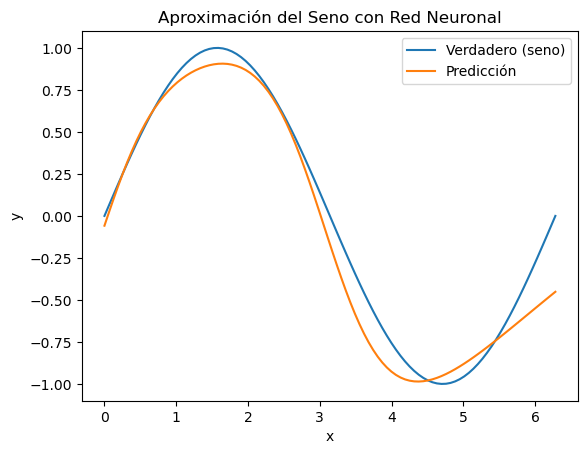

In [9]:
# Hiperparámetros
hidden_units = 10  # Neuronas en capa oculta
learning_rate = 0.1
epochs = 10000

# Inicialización de pesos (aleatoria)
W1 = np.random.randn(1, hidden_units) * 0.01  # Capa oculta
b1 = np.zeros((1, hidden_units))
W2 = np.random.randn(hidden_units, 1) * 0.01   # Capa salida
b2 = np.zeros((1, 1))

# Entrenamiento
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(x.reshape(-1, 1), W1) + b1  # Shape: (100, hidden_units) --> Z1 = x * W1 + b1
    H = np.tanh(Z1)                          # Activación tanh --> tanh(Z1) = H
    Z2 = np.dot(H, W2) + b2                  # Shape: (100, 1) --> Z2 = y_pred = H * W2 + b2
    y_pred = Z2  # Sin activación (regresión)
    
    # Pérdida (MSE)
    loss = np.mean((y.reshape(-1, 1) - y_pred)**2) #--> Mean Squared Error (MSE)
    
    # Backward pass - capa de salida
    dZ2 = -2 * (y.reshape(-1, 1) - y_pred) / len(x)  # Derivada de MSE --> dL/dy_pred
    dW2 = np.dot(H.T, dZ2) # --> dL/dy_pred * dZ2/dW2 = dL2/dW2
    db2 = np.sum(dZ2, axis=0) # --> Suma(dL/dy_pred)
    # Backward pass - capa oculta
    dH = np.dot(dZ2, W2.T) #--> dL/dy_pred * W2
    dZ1 = dH * (1 - np.tanh(Z1)**2)  # Derivada de tanh --> (dL/dy_pred * W2) *dy_pred/dz2 = dL/dH * dh/dz1
    dW1 = np.dot(x.reshape(-1, 1).T, dZ1) #--> dL/dH * dh/dz1 * dz1/dW1 = dL/dW1
    db1 = np.sum(dZ1, axis=0) # --> Suma(dL/dH * dh/dz1)
    
    # Actualización
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Época {epoch}, Pérdida: {loss:.4f}")

# Predicción final
Z1 = np.dot(x.reshape(-1, 1), W1) + b1
H = np.tanh(Z1)
y_pred = np.dot(H, W2) + b2

# Gráfico
plt.plot(x, y, label='Verdadero (seno)')
plt.plot(x, y_pred, label='Predicción')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación del Seno con Red Neuronal')
plt.show()